Imports 

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns  

Load Dataset 

In [62]:
df = pd.read_csv('Mall_Customers.csv')

In [63]:
# show basic info
print('Dataset Head: \n',df.head())
print('\nSummary: \n', df.describe())
print('\nMissing values: \n', df.isnull().sum())

Dataset Head: 
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Summary: 
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.00000

Drop Columns 

In [64]:
df_numeric = df.drop(['CustomerID', 'Gender'], axis=1)

# scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# convert back to dataframe
scaled_df = pd.DataFrame(scaled_data, columns=df_numeric.columns)

print("\nScaled Data Sample: \n", scaled_df.head())


Scaled Data Sample: 
         Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


Elbow Method 

In [65]:
from sklearn.cluster import KMeans

# Try K from 1 to 10
inertia = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

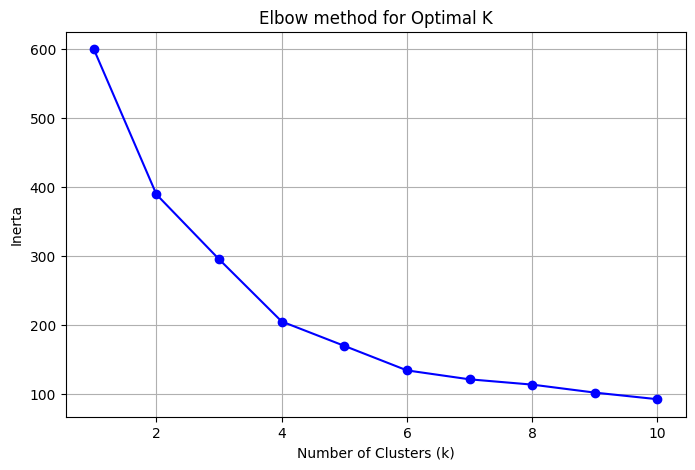

In [66]:
# Plot Elbow graph 
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inerta')
plt.title('Elbow method for Optimal K')
plt.grid(True)
plt.show()

Kmeans Clustering 

In [67]:
# Kmeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_df)


# Apply cluster labels for each customer
clusters = kmeans.labels_

# Apply cluster labels to original dataframe
df['Cluster'] = clusters

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


Scatter Plot 

In [ ]:
# Cluster 0 (blue): Average income, average spending
# Cluster 1 (orange): High income, high spending → 💰💳 "Premium Customers"
# Cluster 2 (green): Low income, high spending → "Target for deals/discounts"
# Cluster 3 (red): Average income, low spending
# Cluster 4 (purple): High income, low spending → "Cautious spenders"

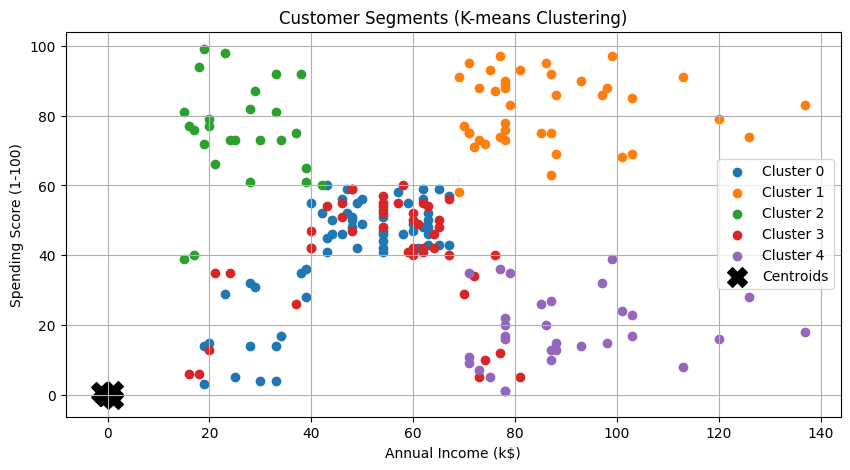

In [68]:
plt.figure(figsize=(10,5))

# Loop through cluster and plot its points 
for i in range(5):
    plt.scatter(
        df[df['Cluster'] == i]['Annual Income (k$)'],
        df[df['Cluster'] == i]['Spending Score (1-100)'],
        label = f'Cluster {i}'
    )
    
# Plot cluster centers
plt.scatter(
    kmeans.cluster_centers_[:, 1],      # X = Annual Income
    kmeans.cluster_centers_[:, 2],      # Y = Spending Score
    s=200, c='black', marker='X', label='Centroids'
)

# Add Labels and legend
plt.title('Customer Segments (K-means Clustering)')
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()